In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton_krylov as krlv
from equations import chareq

# $\Lambda_k$ eigenvalue as function of $k$

The $\Lambda$ is the eigenvalue of integral equation (A3), with the same eigenfunctions, which are the solutions of (A5). Thus, $\Lambda$ is the implicit function of $k$ given by solution of characteristic equation $F_{\chi}(k, \omega) = 0$ with the following condition: $$ \chi \to \Lambda \chi $$ This could be illustrated by:

/home/pviacheslav/PycharmProjects/calculations/Lambda/equations.py:16: RuntimeWarning: invalid value encountered in sqrt
  ha = np.sqrt(eps_l * omega * omega - k * k) * a


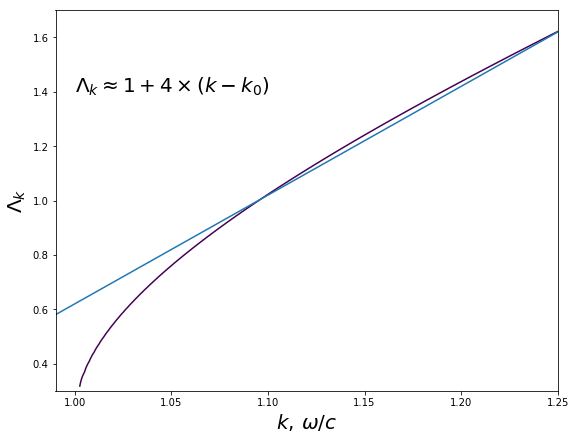

In [49]:
delta = 0.0025
lam_arr = np.arange(0.3,1.7,delta)
k_arr = np.arange(0.8, 1.4, delta)
lam_approx = 1 + 4*(k_arr - 1.095)
LAM, K = np.meshgrid(lam_arr, k_arr)

plt.figure(figsize=(9,7))
plt.contour(K, LAM, chareq(K, LAM), [0])
plt.plot(k_arr, lam_approx)

plt.xlabel(r'$k, \, \omega/c$',fontsize=20)
plt.ylabel(r'$\Lambda_k$',fontsize=20)
plt.xlim([0.99,1.25])
plt.ylim([0.3,1.7])
plt.text(1.,1.4,r'$\Lambda_k \approx 1 + 4 \times (k-k_0)$',fontsize=20)
plt.show()

# Vaccum and waveguide spectra

Considering $\Lambda = 1$ I could plot two kind of spectral dependancies, presented in (A17): the vacuum one and the waveguide.

/home/pviacheslav/PycharmProjects/calculations/Lambda/equations.py:15: RuntimeWarning: invalid value encountered in sqrt
  
/home/pviacheslav/PycharmProjects/calculations/Lambda/equations.py:16: RuntimeWarning: invalid value encountered in sqrt
  ha = np.sqrt(eps_l * omega * omega - k * k) * a
/home/pviacheslav/PycharmProjects/calculations/Lambda/equations.py:18: RuntimeWarning: invalid value encountered in true_divide
  kd = (-kn(0, qa) / 2 - kn(2, qa) / 2) * qa / kn(1, qa)
/home/pviacheslav/PycharmProjects/calculations/Lambda/equations.py:20: RuntimeWarning: divide by zero encountered in true_divide
  
/home/pviacheslav/PycharmProjects/calculations/Lambda/equations.py:21: RuntimeWarning: divide by zero encountered in true_divide
  ceq = ((jd * eps_l * ( qa / ha) ** 2 + kd) * (jd * (qa / ha) ** 2 + kd)) - (


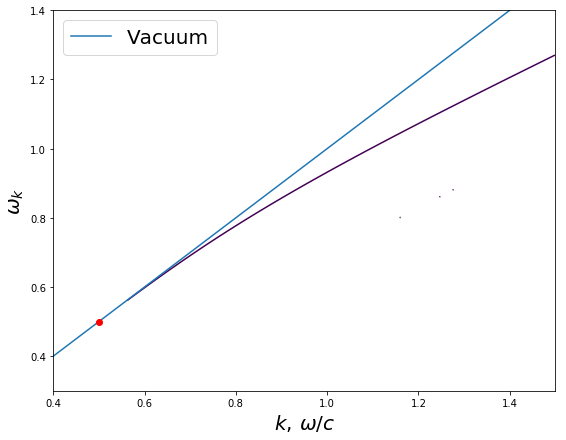

In [52]:
delta = 0.001
omega_arr = np.arange(0.3,1.4,delta)
k_arr = np.arange(0.4, 1.5, delta)
omega_vac = k_arr
OMEGA, K = np.meshgrid(omega_arr, k_arr)

plt.figure(figsize=(9,7))
plt.contour(K, OMEGA, chareq(K, 1., OMEGA), [0],label='Waveguide')
plt.plot(k_arr, omega_vac, label='Vacuum')

k_aim = 0.5
omega_aim = krlv(lambda x: chareq(k_aim, 1., x), k_aim*0.85)

plt.xlabel(r'$k, \, \omega/c$',fontsize=20)
plt.ylabel(r'$\omega_k$',fontsize=20)
plt.plot(k_aim,omega_aim, 'ro')
plt.xlim([0.4,1.5])
plt.ylim([0.3,1.4])
plt.legend(fontsize=20)
plt.show()

Considering $\Lambda = 0.5$

/home/pviacheslav/PycharmProjects/calculations/Lambda/equations.py:15: RuntimeWarning: invalid value encountered in sqrt
  ha = np.sqrt(eps_l * omega * omega - k * k) * a
/home/pviacheslav/PycharmProjects/calculations/Lambda/equations.py:16: RuntimeWarning: invalid value encountered in sqrt
  qa = np.sqrt(k * k - omega * omega) * a


0.116590956037


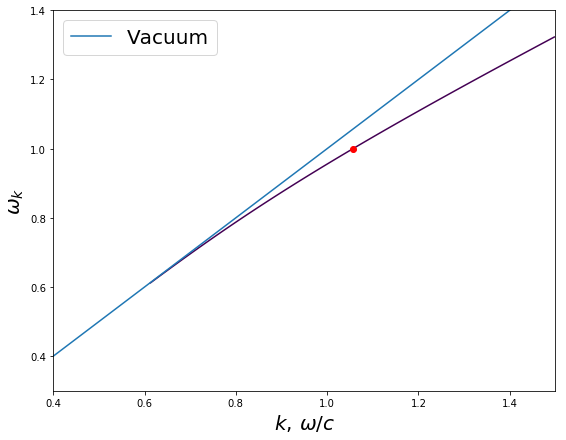

In [32]:
delta = 0.001
lam = 0.8
omega_arr = np.arange(0.3,1.4,delta)
k_arr = np.arange(0.4, 1.5, delta)
omega_vac = k_arr
OMEGA, K = np.meshgrid(omega_arr, k_arr)

plt.figure(figsize=(9,7))
plt.contour(K, OMEGA, chareq(K, lam, OMEGA), [0],label='Waveguide')
plt.plot(k_arr, omega_vac, label='Vacuum')

omega_aim = 1.
k_aim = krlv(lambda x: chareq(x, lam, omega_aim), omega_aim*1.1)
print((k_aim**2-omega_aim**2)/omega_aim**2)

plt.xlabel(r'$k, \, \omega/c$',fontsize=20)
plt.ylabel(r'$\omega_k$',fontsize=20)
plt.plot(k_aim,omega_aim, 'ro')
plt.xlim([0.4,1.5])
plt.ylim([0.3,1.4])
plt.legend(fontsize=20)
plt.show()